Introduction

Computer vision is among the hottest fields in any industry right now. It is thriving thanks to the rapid advances in technology and research. But it can be a daunting space for newcomers. There are some common challenges data scientists face when transitioning into computer vision, including:

1-How do we clean image datasets? Images come in different shapes and sizes
2-The ever-present problem of acquiring data. Should we collect more images before building our computer vision model?
3-Is learning deep learning compulsory for building computer vision models? Can we not use machine learning techniques?
4-Can we build a computer vsiion model on our own machine? Not everyone has access to GPUs and TPUs!

Table of Contents
1-What is Computer Vision?
2-Why use OpenCV for Computer Vision Tasks?
3-Reading, Writing and Displaying Images
4-Changing Color Spaces
5-Resizing Images
6-Image Rotation
7-Image Translation
8-Simple Image Thresholding
9-Adaptive Thresholding
10-Image Segmentation (Watershed Algorithm)
11-Bitwise Operations
12-Edge Detection
13-Image Filtering
14-Image Contours
15-Scale Invariant Feature Transform (SIFT)
16-Speeded-Up Robust Features (SURF)
17-Feature Matching
18-Face Detection

Reading, Writing and Displaying Images


Now, let’s see how to import an image into our machine using OpenCV. Download the image from here.
https://drive.google.com/open?id=1opqTM5_gRkhO3HQ9_KcBQ2KBppiy_xsL


Reading, Writing and Displaying Images


True

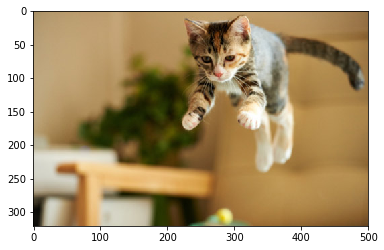

In [4]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#reading the image 

image = cv2.imread('index.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plotting the image
plt.imshow(image)

#saving image
cv2.imwrite('test_write.jpg',image)

By default, the imread function reads images in the BGR (Blue-Green-Red) format. We can read images in different formats using extra flags in the imread function:

1-cv2.IMREAD_COLOR: Default flag for loading a color image
2-cv2.IMREAD_GRAYSCALE: Loads images in grayscale format
3-cv2.IMREAD_UNCHANGED: Loads images in their given format, including the alpha channel. Alpha channel stores the transparency information – the higher the value of alpha channel, the more opaque is the pixel


Changing Color Spaces

A color space is a protocol for representing colors in a way that makes them easily reproducible. We know that grayscale images have single pixel values and color images contain 3 values for each pixel – the intensities of the Red, Green and Blue channels.

Most computer vision use cases process images in RGB format. However, applications like video compression and device independent storage – these are heavily dependent on other color spaces, like the Hue-Saturation-Value or HSV color space.

As you understand a RGB image consists of the color intensity of different color channels, i.e. the intensity and color information are mixed in RGB color space but in HSV color space the color and intensity information are separated from each other. This makes HSV color space more robust to lighting changes.

OpenCV reads a given image in the BGR format by default. So, you’ll need to change the color space of your image from BGR to RGB when reading images using OpenCV. Let’s see how to do that:

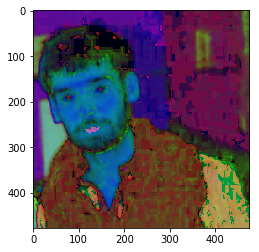

In [6]:
#import the required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 
image = cv2.imread('index.jpg') 
#converting image to Gray scale 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#plotting the grayscale image
plt.imshow(gray_image) 
#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#plotting the HSV image
plt.imshow(hsv_image)

Resizing Images


Machine learning models work with a fixed sized input. The same idea applies to computer vision models as well. The images we use for training our model must be of the same size.

Now this might become problematic if we are creating our own dataset by scraping images from various sources. That’s where the function of resizing images comes to the fore.

Images can be easily scaled up and down using OpenCV. This operation is useful for training deep learning models when we need to convert images to the model’s input shape. Different interpolation and downsampling methods are supported by OpenCV, which can be used by the following parameters:

1-INTER_NEAREST: Nearest neighbor interpolation
2-INTER_LINEAR: Bilinear interpolation
3-INTER_AREA: Resampling using pixel area relation
4-INTER_CUBIC: Bicubic interpolation over 4×4 pixel neighborhood
5-INTER_LANCZOS4: Lanczos interpolation over 8×8 neighborhood


OpenCV’s resize function uses bilinear interpolation by default.


Image Rotation

“You need a large amount of data to train a deep learning model”. I’m sure you must have comes across this line of thought in form or another. It’s partially true – most deep learning algorithms are heavily dependent on the quality and quantity of the data.


Let me introduce you to the technique of data augmentation. This method allows us to generate more samples for training our deep learning model. Data augmentation uses the available data samples to produce the new ones, by applying image operations like rotation, scaling, translation, etc. This makes our model robust to changes in input and leads to better generalization.

Rotation is one of the most used and easy to implement data augmentation techniques. As the name suggests, it involves rotating the image at an arbitrary angle and providing it the same label as the original image. Think of the times you have rotated images in your phone to achieve certain angles – that’s basically what this function does.



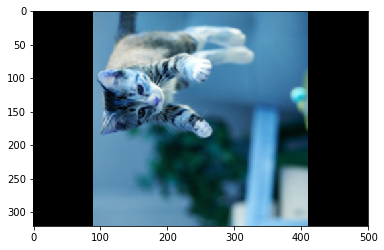

In [9]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('index.png') 
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

Image Translation

Image translation is a geometric transformation that maps the position of every object in the image to a new location in the final output image. After the translation operation, an object present at location (x,y) in the input image is shifted to a new position (X,Y):

X = x + dx

Y = y + dy

Here, dx and dy are the respective translations along different dimensions.

Image translation can be used to add shift invariance to the model, as by tranlation we can change the position of the object in the image give more variety to the model that leads to better generalizability which works in difficult conditions i.e. when the object is not perfectly aligned to the center of the image.

This augmentation technique can also help the model correctly classify images with partially visible objects. Take the below image for example. Even when the complete iamge is not present in the image, the model should be able to classify it as a image.

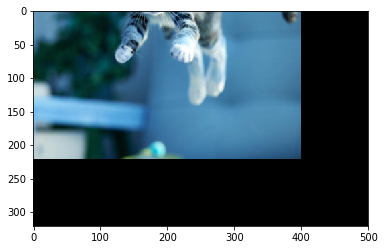

In [10]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
#reading the image
image = cv2.imread('index.png')
#shifting the image 100 pixels in both dimensions
M = np.float32([[1,0,-100],[0,1,-100]]) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

Simple Image Thresholding

Thresholding is an image segmentation method. It compares pixel values with a threshold value and updates it accordingly. OpenCV supports multiple variations of thresholding. A simple thresholding function can be defined like this:

if Image(x,y) > threshold , Image(x,y) = 1

otherswise, Image(x,y) = 0

Thresholding can only be applied to grayscale images.

A simple application of image thresholding could be dividing the image into it’s foreground and background.

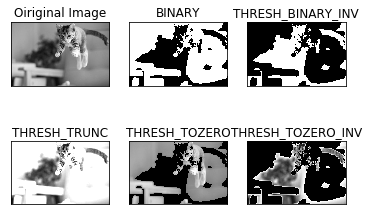

In [11]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 

#here 0 means that the image is loaded in gray scale format
gray_image = cv2.imread('index.png',0)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

Edge Detection

Edges are the points in an image where the image brightness changes sharply or has discontinuities. Such discontinuities generally correspond to:

Discontinuities in depth
Discontinuities in surface orientation
Changes in material properties
Variations in scene illumination
Edges are very useful features of an image that can be used for different applications like classification of objects in the image and localization. Even deep learning models calculate edge features to extract information about the objects present in image.

Edges are different from contours as they are not related to objects rather they signify the changes in pixel values of an image. Edge detection can be used for image segmentation and even for image sharpening.

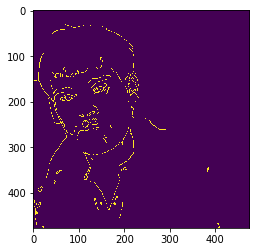

In [12]:
#import the required libraries
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline
#read the image
image = cv2.imread('index.jpg') 
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges)

Image Filtering

In image filtering, a pixel value is updated using its neighbouring values. But how are these values updated in the first place?

Well, there are multiple ways of updating pixel values, such as selecting the maximum value from neighbours, using the average of neighbours, etc. Each method has it’s own uses. For example, averaging the pixel values in a neighbourhood is used for image blurring.



Gaussian filtering is also used for image blurring that gives different weights to the neighbouring pixels based on their distance from the pixel under consideration.

For image filtering, we use kernels. Kernels are matrices of numbers of different shapes like 3 x 3, 5 x 5, etc. A kernel is used to calculate the dot product with a part of the image. When calculating the new value of a pixel, the kernel center is overlapped with the pixel. The neighbouring pixel values are multiplied with the corresponding values in the kernel. The calculated value is assigned to the pixel coinciding with the center of the kernel.